In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
import scipy.spatial.distance as dt
import math

In [2]:
#D = spa.distance_matrix(centroids, X)

In [3]:
data_set = np.genfromtxt("hw08_data_set.csv", delimiter = ",")

In [4]:
D = dt.cdist(data_set, data_set)

In [5]:
B = D.copy()

In [6]:
epsilon = 1.25
B[B > epsilon] = 0

In [7]:
B[B > 0] = 1

In [8]:
#co = np.matmul(B, data_set[:])

In [9]:
#conn = B * D

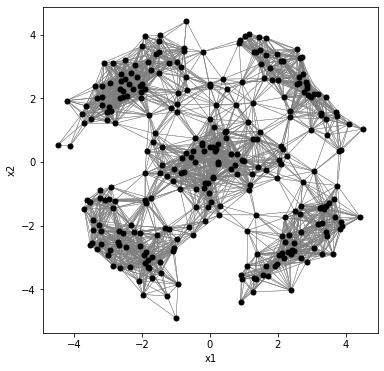

In [10]:
plt.figure(figsize=(6, 6))
for i in np.argwhere(B == 1): ## where there are connections
    plt.plot([data_set[i[0]][0], data_set[i[1]][0]], [data_set[i[0]][1], data_set[i[1]][1]], "tab:gray", linewidth=0.4)
plt.plot(data_set[:, 0], data_set[:, 1], "k.", markersize=10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [11]:
Dmx = np.diag(np.sum(B, axis = 1))

In [12]:
L = Dmx - B

In [13]:
Lrw = np.eye(300) - np.matmul(np.sqrt(np.linalg.inv(Dmx)), L)

In [14]:
Lsym = np.eye(300) - np.matmul(np.matmul(np.sqrt(np.linalg.inv(Dmx)), B), np.sqrt(np.linalg.inv(Dmx)))

In [15]:
Z = np.linalg.eig(Lsym)[1][:, np.argsort(np.linalg.eig(Lsym)[0])[1:6]] #Z matrix

In [16]:
N = 300
# cluster count
K = 5
X = Z

In [17]:
centr = np.vstack([X[28], X[142], X[203], X[270], X[276]])

In [18]:
def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("x1")
    plt.ylabel("x2")

In [19]:
def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        centroids = centr
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

Iteration#1:


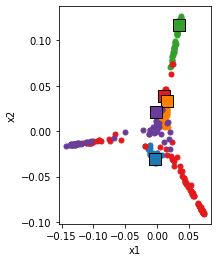

Iteration#2:


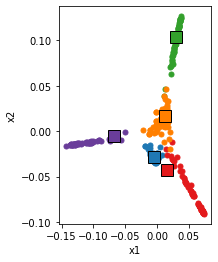

Iteration#3:


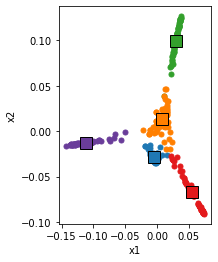

Iteration#4:


In [20]:
centroids = centr
memberships = None
iteration = 1
while True:
    print("Iteration#{}:".format(iteration))

    old_centroids = centroids
    centroids = update_centroids(memberships, X)

    old_memberships = memberships
    memberships = update_memberships(centroids, X)
    if np.alltrue(memberships == old_memberships):
        plt.show()
        break
    else:
        plt.subplot(1, 2, 2)
        plot_current_state(centroids, memberships, X)
        plt.show()

    iteration = iteration + 1

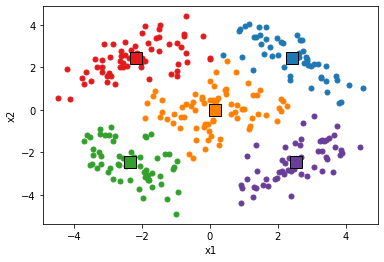

In [21]:
centroids = update_centroids(memberships, data_set)
plot_current_state(centroids, memberships, data_set)